In [1]:
## 참고 사이트
## -> https://sd118687.tistory.com/8
## -> https://sd118687.tistory.com/7
## -> https://sd118687.tistory.com/11


In [2]:
import torch
import numpy as np

# tensor shape (1, x, y)
def mirroring_Extrapolate(img):  ## 하나의 텐서 img를 입력으로 받음 -> (1,x,y) / x는 너비, y는 높이
    # mirroring 92 pixel

    x = img.shape[1]  ## 너비
    y = img.shape[2]  ## 높이

    ## 입력된 텐서를 넘파이 배열로 변환
    np_img = np.array(img)
    ## 첫 번째 채널 선택 -> 흑백 이미지이기 때문에 
    np_img = np_img[0]

    ## 이미지를 특정 크기로 조정하기 위한 조건
    if x < 388:  ## 너비가 388 미만인 경우 양쪽에 패딩을 추가해 전체 너비가 572가 되게 함
        pad_x_left = (572 - x) / 2
        pad_x_right = (572 - x) / 2
    else:  ## 너비가 388 이상일 경우 왼쪽엔 92 픽셀, 오른쪽엔 (x%388)을 388에서 뺀 값에 92를 더해 패딩을 추가
        pad_x_left = 92
        pad_x_right = 388 - (x % 388) + 92

    ## 이미지를 특정 높이로 조정하기 위한 조건
    if y < 388:
        pad_y_up = (572 - y) / 2
        pad_y_down = (572 - y) / 2
    else:
        pad_y_up = 92
        pad_y_down = 388 - (y % 388) + 92

    ## np.pad(): 계산된 패딩을 이미지에 적용
    np_img = np.pad(np_img, ((pad_x_left, pad_x_right), (pad_y_up, pad_y_down)), 'reflect')
    ## reflect: 거울 반사 패딩을 의미 -> 이미지의 경계를 넘어서는 패딩 영역에 원본 이미지의 반사된 복사본을 사용
    ## -> 즉, 패딩 영역에 이미지의 경계 부분이 반사되어 반복됨

    ## 패딩된 이미지에 새로운 차원을 추가해 텐서로 변환하기 적합한 형태로 만듦
    np_img = np_img[:, :, np.newaxis]

    ## 차원 재배열
    ## 배열의 차원을 (x, y, 1)에서 (1,x,y)로 변경함
    return torch.from_numpy(np_img.transpose((2, 0, 1)))

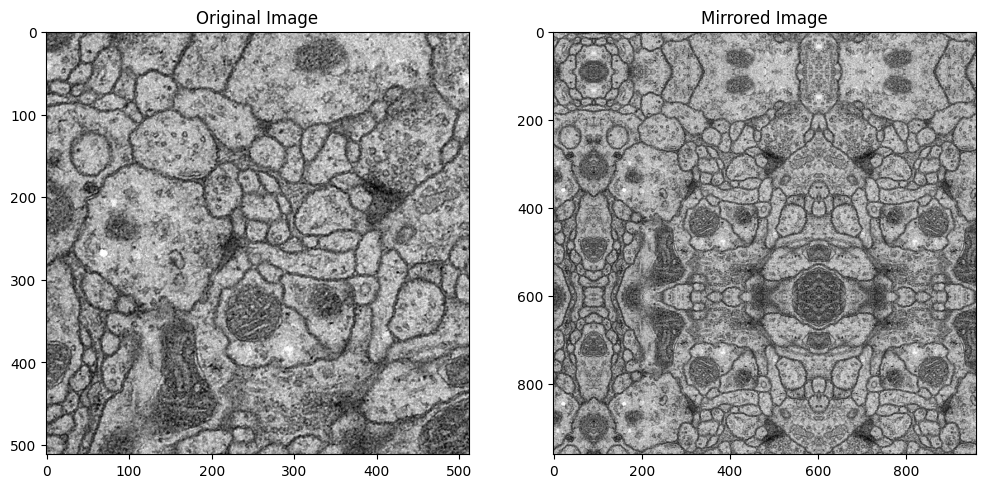

In [3]:
import matplotlib.pyplot as plt

# .npy 파일 로드
npy_path = './datasets/train/input_002.npy' # .npy 파일 경로
np_img = np.load(npy_path)

# NumPy 배열을 텐서로 변환
img_tensor = torch.from_numpy(np_img).unsqueeze(0) # (1, H, W) 형태로 변환

# mirroring_Extrapolate 함수를 사용하여 이미지에 미러링 적용
mirrored_img_tensor = mirroring_Extrapolate(img_tensor)

# 원본 이미지와 미러링된 이미지 시각화
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(img_tensor[0], cmap='gray')
ax[0].set_title('Original Image')
ax[1].imshow(mirrored_img_tensor[0], cmap='gray')
ax[1].set_title('Mirrored Image')
plt.show()